# <font color = "blue"> Определение перспективного тарифа для телеком компании </font>

## Описание проекта
    Исследование для компании «Мегалайн» — федерального оператора сотовой связи. 
    Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Нужно определить, какой тариф приносит больше денег.
    Данные - выборка по 500 пользователям "Мегалайна. 
    Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
    Тариф «Смарт»
        Ежемесячная плата: 550 рублей
        Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
        Стоимость услуг сверх тарифного пакета:
            минута разговора: 3 рубля
            сообщение: 3 рубля
            1 Гб интернет-трафика: 200 рублей
    Тариф «Ультра»
        Ежемесячная плата: 1950 рублей
        Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
        Стоимость услуг сверх тарифного пакета:
            минута разговора: 1 рубль
            сообщение: 1 рубль
            1 Гб интернет-трафика: 150 рублей
Округление значений минут и мегабайтов - всегда вверх

## Описание данных
    Таблица users (информация о пользователях):
        user_id — уникальный идентификатор пользователя
        first_name — имя пользователя
        last_name — фамилия пользователя
        age — возраст пользователя (годы)
        reg_date — дата подключения тарифа (день, месяц, год)
        churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
        city — город проживания пользователя
        tariff — название тарифного плана
    Таблица calls (информация о звонках):
        id — уникальный номер звонка
        call_date — дата звонка
        duration — длительность звонка в минутах
        user_id — идентификатор пользователя, сделавшего звонок
    Таблица messages (информация о сообщениях):
        id — уникальный номер сообщения
        message_date — дата сообщения
        user_id — идентификатор пользователя, отправившего сообщение
    Таблица internet (информация об интернет-сессиях):
        id — уникальный номер сессии
        mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
        session_date — дата интернет-сессии
        user_id — идентификатор пользователя
    Таблица tariffs (информация о тарифах):
        tariff_name — название тарифа
        rub_monthly_fee — ежемесячная абонентская плата в рублях
        minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
        messages_included — количество сообщений в месяц, включённых в абонентскую плату
        mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
        rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
        rub_per_message — стоимость отправки сообщения сверх тарифного пакета
        rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## 1. Загрузка и просмотр данных

In [33]:
import pandas as pd
import math as mt
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [5]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tarrifs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [6]:
def main_info(df):
    '''Функция для просмотра общей информации о датафрейме'''
    print ('\033[1m' + 'Инфо' + '\033[0m')
    display(df.info())
    print ('\033[1m' + 'Описание' + '\033[0m')
    display(df.describe())
    print ('\033[1m' + 'Первые 10 строк' + '\033[0m')
    display(df.head(10))

In [7]:
calls.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Описание


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Первые 10 строк


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [8]:
internet.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Описание


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Первые 10 строк


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [9]:
messages.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Описание


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Первые 10 строк


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
tarrifs.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Описание


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Первые 10 строк


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Описание


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Первые 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Отметим особенности данных:   

таблица calls - в столбце duration есть длительность 0.00, таких данных почти 40 тыс - скорректировать 

перевести даты в спец формат  

messages - перевести даты в соответствующий тип


## 2. Предобработка данных

В таблице calls значение 0, вероятно, является не округленным коротким разговором. Например, округление и обработка происходит позже, а нам дали сырые данные. Округлим значения вверх, заменим оставшиеся 0 на 1

In [12]:
## Округлим значения вверх
calls['duration']=calls['duration'].apply(lambda x: mt.ceil(x))
calls['duration']=calls['duration'].replace(0,1)
calls['duration'].describe()


# Работаем с представлением данных о дате и времени
## Таблица users

users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']= pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

users['reg_date_month']=pd.DatetimeIndex(users['reg_date']).month

users['churn_date_month']=pd.DatetimeIndex(users['churn_date']).month
users['churn_date_month'] = users['churn_date_month'].fillna(12)
users.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month
490,1490,30,NaT,Москва,Радомир,Алесин,2018-04-03,smart,4,12.0
491,1491,56,NaT,Челябинск,Радислав,Андрейкин,2018-04-25,ultra,4,12.0
492,1492,63,NaT,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart,6,12.0
493,1493,71,NaT,Красноярск,Таисия,Ахматулина,2018-11-24,ultra,11,12.0
494,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,8,12.0
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8,12.0
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,1,12.0
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10,12.0
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.0
499,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12.0


Поработали с представлением данных о дате и времени, скорректировали нулевые длительности разговоров.

## 3. Общий анализ пользователей

In [14]:
# Определим количество израсходованных минут разговора по месяцам

## Выделим из дат месяцы в отдельный столбец
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

users_calls = users.merge(calls, on = 'user_id')

calls_month_sum = users_calls.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index()

In [15]:
# Определим количество отправленных сообщений по месяцам

## Выделим из дат месяцы в отдельный столбец
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

users_messages = users.merge(messages, on = 'user_id')
#users_messages.head(10)

## Количество отправленных сообщений по месяцам

messages_month_count = users_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_month_count.rename(columns = {'id' : 'messages'}, inplace = True)


In [16]:
# Определим объем израсходованного интернет-трафика по месяцам

## Добавим столбец с месяцами
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

users_internet = users.merge(internet, on = 'user_id')
#users_internet.head(10)

## объем израсходованного интернет-трафика по месяцам:
internet_month_sum = users_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
internet_month_sum.head(10)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


In [17]:
# Сформируем общую таблицу с информацией об использованных услугах по месяцам

users_month_info = (calls_month_sum.merge(messages_month_count, how = 'outer', on = ['user_id', 'month']).
                    merge(internet_month_sum, how = 'outer', on = ['user_id', 'month']).
                    merge(users[['user_id', 'tariff', 'city']], how = 'left', on = 'user_id'))

users_month_info = users_month_info.fillna(0) # пропуски заполняем нулями, т.к. в могли использоваться не все услуги
       

In [18]:
# Рассчитаем выручку по месяцам

for i in range(0,len(users_month_info)):
    # Если тариф пользователя - smart
    if users_month_info.loc[i,'tariff'] == 'smart':
        # минуты сверх бесплатных
        minutes_not_free = users_month_info.loc[i,'duration'] - tarrifs.loc[0,'minutes_included']
        if minutes_not_free > 0: 
            minutes_payed = minutes_not_free
        else:
            minutes_payed = 0
          # сообщения сверх бесплатных  
        messages_not_free = users_month_info.loc[i,'messages'] - tarrifs.loc[0,'messages_included']
        if messages_not_free > 0: #
            messages_payed = messages_not_free
        else:
            messages_payed = 0
            # мегабайты сверх бесплатных, перевод в гигабайты
        mb_not_free = users_month_info.loc[i,'mb_used'] - tarrifs.loc[0,'mb_per_month_included']
        if mb_not_free > 0:
            gb_payed = messages_not_free/1024
        else:
            gb_payed = 0
        
        users_month_info.loc[i,'payed'] = (minutes_payed * tarrifs.loc[0,'rub_per_minute'] + 
                                      messages_payed * tarrifs.loc[0,'rub_per_message'] +
                                      gb_payed * tarrifs.loc[0,'rub_per_gb'] +
                                      tarrifs.loc[0,'rub_monthly_fee'])
        
        # то же - если у пользователя тариф ultra
    if users_month_info.loc[i,'tariff'] == 'ultra':
        
        minutes_not_free = users_month_info.loc[i,'duration'] - tarrifs.loc[1,'minutes_included']
        if minutes_not_free > 0:
            minutes_payed = minutes_not_free
        else:
            minutes_payed = 0
            
        messages_not_free = users_month_info.loc[i,'messages'] - tarrifs.loc[1,'messages_included']
        if messages_not_free > 0:
            messages_payed = messages_not_free
        else:
            messages_payed = 0
            
        mb_not_free = users_month_info.loc[i,'mb_used'] - tarrifs.loc[1,'mb_per_month_included']
        if mb_not_free > 0:
            gb_payed = mb_not_free/1024
        else:
            gb_payed = 0
        
        users_month_info.loc[i,'payed'] = (minutes_payed * tarrifs.loc[1,'rub_per_minute'] + 
                                      messages_payed * tarrifs.loc[1,'rub_per_message'] +
                                      gb_payed * tarrifs.loc[1,'rub_per_gb'] +
                                      tarrifs.loc[1,'rub_monthly_fee'])
users_month_info.head(10)      

,user_id,month,duration,messages,mb_used,tariff,city,payed
0,1000,5,164.0,22.0,2253.49,ultra,Краснодар,1950.000000
1,1000,6,187.0,60.0,23233.77,ultra,Краснодар,1950.000000
2,1000,7,346.0,75.0,14003.64,ultra,Краснодар,1950.000000
3,1000,8,418.0,81.0,14055.93,ultra,Краснодар,1950.000000
4,1000,9,478.0,57.0,14568.91,ultra,Краснодар,1950.000000
5,1000,10,363.0,73.0,14702.49,ultra,Краснодар,1950.000000
6,1000,11,344.0,58.0,14756.47,ultra,Краснодар,1950.000000
7,1000,12,341.0,70.0,9817.61,ultra,Краснодар,1950.000000
8,1001,11,444.0,0.0,18429.34,smart,Москва,540.234375
9,1001,12,430.0,0.0,14036.66,smart,Москва,550.000000


In [19]:
# Выделим в отдельные таблицы данные о пользователях разных тарифов для удобства
users_ultra = users_month_info.query('tariff == "ultra"') # данные о пользователях тарифа ультра
users_smart = users_month_info.query('tariff == "smart"') # данные о пользователях тарифа смарт

Подготовили данные для дальнейшего анализа, определили выручку, выделили пользователей разных тарифов

# 4. Статистический анализ

Изучим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

In [20]:
# Определим среднее количество, дисперсию и стандартное отклонение минут, сообщений и интернет-трафика в месяц
std_lambda = lambda x: np.std(x, ddof=1)
std_lambda.__name__ = 'std'

var_lambda = lambda x: np.var(x, ddof=1)
var_lambda.__name__ = 'var'


tarifs_statistics = users_month_info.pivot_table(
    columns = 'tariff', values = ['duration', 'messages', 'mb_used', 'payed'], 
    aggfunc = ['mean','var', 'std'])
tarifs_statistics

mean                         var                        std  \
tariff           smart         ultra         smart         ultra        smart   
duration    429.450875    540.779695  3.797477e+04  1.061057e+05   194.871174   
mb_used   16208.386990  19468.805208  3.446250e+07  1.017510e+08  5870.476681   
messages     33.384029     49.363452  7.968130e+02  2.285266e+03    28.227876   
payed       707.541989   2059.868918  7.851521e+04  1.259404e+05   280.205659   

                        
tariff           ultra  
duration    325.738740  
mb_used   10087.170752  
messages     47.804457  
payed       354.880790

Построим гистограммы длительности разговоров, числа сообщений и объема траффика для пользователей тарифов Смарт и Ультра

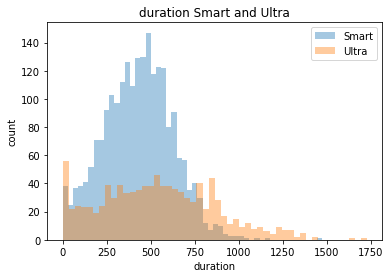

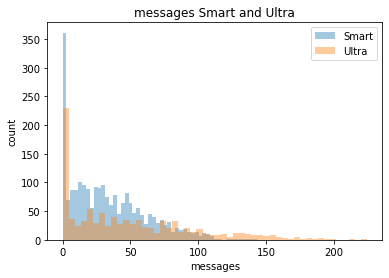

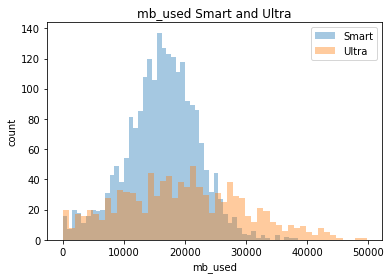

In [53]:
plt.figure()
for column in ['duration','messages','mb_used']:
    plt.hist(users_smart[column], bins = 50, alpha = 0.4)
    plt.hist(users_ultra[column], bins = 50, alpha = 0.4)
    plt.title(column + " Smart and Ultra")
    plt.ylabel('count')
    plt.xlabel(column)
    plt.legend(['Smart','Ultra'])
    plt.show()

По гистограммам тарифа "смарт" можно сделать следующие выводы: гистограмма минут является скошенной влево, т.е. большинство пользователей тратит меньше среднего количества минут на звонки, в гистограмме сообщений пик в нулевом значении - многие пользователи не отправляют смс сообщений, гистограмма траффика стремится к нормальному распределению. 

По гистограммам тарифа "ультра" можно сделать выводы: многие пользователи не тратят минуты разговоров и не отправляют сообщения - что объясняется, вероятно, активным использованием мессенджеров. По гистограмме трафика можно заметить, что большое число пользователей выходит за рамки бесплатного объема трафика. 

# 5. Проверка гипотез

Проверим гипотезы:
    1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    
Используем метод scipy.stats.ttest_ind для проверки равенства среднего выборок.

**Нулевая гипотеза H0:**  

- средние исследуемых выборок равны; 

**Альтернативная гипотеза H1**: 

- средние различаются

In [60]:
alpha = 0.05 # задаем уровень значимости

def stat_proverka(df_1, df_2):
    sample_1 = df_1['payed']
    sample_2 = df_2['payed']
    results = st.ttest_ind(sample_1,sample_2,equal_var=False)
    display(results.pvalue)
    if results.pvalue < alpha:
        display('Отвергаем гипотезу о равенстве')
    else:
        display('Не удалось отвергнуть гипотезу о равенстве')

# Проверим гипотезу о равенстве выручки от пользователей разных тарифов
display('Сравним тариф смарт и ультра')
stat_proverka(users_smart, users_ultra)
display('----')


# Проверим гипотезу о равенстве выручки от пользователей Москвы и регионов для тарифа ультра
sample_moscow_ultra = users_ultra.query('city == "Москва"')
sample_other_cities_ultra = users_ultra.query('city != "Москва"')
display('Сравним Москву и регионы для тарифа ультра')
stat_proverka(sample_moscow_ultra,sample_other_cities_ultra)
display('----')

# Проверим гипотезу о равенстве выручки от пользователей Москвы и регионов для тарифа смарт
sample_moscow_smart = users_smart.query('city == "Москва"')
sample_other_cities_smart = users_smart.query('city != "Москва"')
display('Сравним Москву и регионы для тарифа смарт')
stat_proverka(sample_moscow_smart,sample_other_cities_smart)
display('----')

# Проверим гипотезу о равенстве выручки от пользователей Москвы и регионов 
sample_moscow = users_month_info.query('city == "Москва"')
sample_other_cities = users_month_info.query('city != "Москва"')
display('Сравним Москву и регионы для всех пользователей')
stat_proverka(sample_moscow,sample_other_cities)
  
    

'Сравним тариф смарт и ультра'

0.0

'Отвергаем гипотезу о равенстве'

'----'

'Сравним Москву и регионы для тарифа ультра'

0.8802104090416792

'Не удалось отвергнуть гипотезу о равенстве'

'----'

'Сравним Москву и регионы для тарифа смарт'

0.23812656452884395

'Не удалось отвергнуть гипотезу о равенстве'

'----'

'Сравним Москву и регионы для всех пользователей'

0.0036662869627599967

'Отвергаем гипотезу о равенстве'

### Вывод
Таким образом, выручка от тарифов существенно различается.
Без учета тарифа выручка в Москве и регионах отличается, однако в рамках каждого тарифа нельзя сказать о существенном отличии выручки в Москве от выручки в регионах.

# Общий вывод

   Пользователи с тарифом **Ультра** из представленной выборки в среднем тратят на разговоры 540 мин, отправляют 49 сообщений и используют около 20 ГБ интернет-траффика.  
   Пользователи с тарифом **Смарт** из выборки в среднем тратят на разговоры 430 мин, отправляют 33 сообщения и используют около 16 ГБ интернет-траффика. 
   
   Тариф **Ультра** приносит компании большую выручку по сравнению с тарифом **Смарт**-  в среднем, 2059 р против 707 р ежемесячно с пользователя. В представленной выборке пользователи тарифа **Ультра** потребляют примерно в 1,5 раза больше услуг и при этом платят почти в 3 раза больше, чем пользователи тарифа **Смарт**. 
   
   Сравнивая выручку по регионам, можно отметить, что в рамках каждого тарифа выручка от пользователей Москвы и регионов сопоставима, но в целом выручка от пользователей Москвы больше.